In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 14

from sklearn import linear_model, model_selection, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, f1_score, brier_score_loss
import scikitplot as skplt

pd.set_option('display.float_format', lambda x: '%3f' % x)

In [2]:
def gen_auc_viz(fpr, tpr, threshold):
    
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    plt.figure(figsize=(8,6))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
                lw=lw, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.title('Reorder (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show();

In [3]:
def plot_cm(y_true, y_pred):
    
    skplt.metrics.plot_confusion_matrix(
        y_true, 
        y_pred,
        figsize=(8,,8))
    
#     tn = cm.iloc[0,0]
#     fn = cm.iloc[1,0]
#     fp = cm.iloc[0,1]
#     tp = cm.iloc[1,1]
    
#     acc = (tp+tn) / (tp+tn+fp+fn)
#     sen = (tp) / (tp+fn) #summarizes how well the positive class was predicted.
#     prec = tp / (tp+fp) #summarizes the fraction of examples assigned the positive class that belong to the positive class
#     rec = tp/(tp+fn) #same as sensitivity 
#     pp = tp / (tp+fp)
    
#     return acc, sen, prec, rec, pp

In [4]:
def scores_output(y_test, y_pred):

    plot_cm(y_test, y_pred)
    
    f1=f1_score(y_test,y_pred)
    brier=brier_score_loss(y_test,y_pred)
    auc=roc_auc_score(y_test,y_pred)
    
    print(classification_report(y_test,y_pred))
    print(f"f1:{f1:.5f},auc:{auc:.5f},loss_score:{brier:.5f}")

In [5]:
full_df = pd.read_csv('../../data/full_df.csv')
# train_df = pd.read_csv('../../data/train_df.csv')
# prior_df = pd.read_csv('../../data/prior_df.csv')
# test_df = pd.read_csv('../../data/test_df.csv')

In [6]:
full_df.drop('Unnamed: 0',axis=1,inplace=True)
full_df.head()

,user_id,product_id,eval_set,target,order_id,user_product_count,user_product_first_order,user_product_last_order,user_product_avg_basket_placement,product_ordered_vol,...,user_reorder_ratio,user_total_orders,user_lifetime_days,user_avg_days_between_orders,user_max_time_between_orders,user_min_time_between_orders,user_avg_cart_size,user_product_order_rate,user_product_reorder_rate,user_product_last_time_product_ordered
0,112108,49302,train,1,1,3,1,4,2.000000,170,...,0.764706,4,167.000000,9.823529,15.000000,7.000000,6.250000,0.750000,0.750000,0
1,112108,11109,train,1,1,3,1,4,3.333333,4579,...,0.764706,4,167.000000,9.823529,15.000000,7.000000,6.250000,0.750000,0.750000,0
2,112108,43633,train,1,1,3,1,4,4.000000,663,...,0.764706,4,167.000000,9.823529,15.000000,7.000000,6.250000,0.750000,0.750000,0
3,112108,22035,train,1,1,3,1,4,6.000000,61241,...,0.764706,4,167.000000,9.823529,15.000000,7.000000,6.250000,0.750000,0.750000,0
4,79431,19660,train,1,36,16,2,23,4.562500,57921,...,0.500000,23,3238.000000,17.597826,30.000000,2.000000,8.391304,0.695652,0.727273,0


In [7]:
#filling in null values - for previous calculations where user didn't do any reorders
full_df.product_ordered_twice_vol.fillna(0,inplace=True)
full_df.product_order_twice_ratio.fillna(0,inplace=True)
full_df.user_unique_reorder_count.fillna(0,inplace=True)
full_df.user_unique_reorder_perc.fillna(0,inplace=True)
full_df.user_total_items_after_first_order.fillna(0,inplace=True)
full_df.user_reorder_ratio.fillna(0,inplace=True)
full_df.isnull().sum()

user_id                                   0
product_id                                0
eval_set                                  0
target                                    0
order_id                                  0
user_product_count                        0
user_product_first_order                  0
user_product_last_order                   0
user_product_avg_basket_placement         0
product_ordered_vol                       0
product_reordered_vol                     0
product_ordered_once_vol                  0
product_ordered_twice_vol                 0
product_order_twice_ratio                 0
product_avg_reorders                      0
product_overall_reorder_prob              0
user_total_products                       0
user_total_products_reordered             0
user_unique_product_count                 0
user_unique_reorder_count                 0
user_unique_product_perc                  0
user_unique_reorder_perc                  0
user_total_items_after_first_ord

In [8]:
print(full_df.target.value_counts())
print(full_df.target.value_counts(normalize=True))


0    7645837
1     828824
Name: target, dtype: int64
0   0.902200
1   0.097800
Name: target, dtype: float64


<AxesSubplot:>

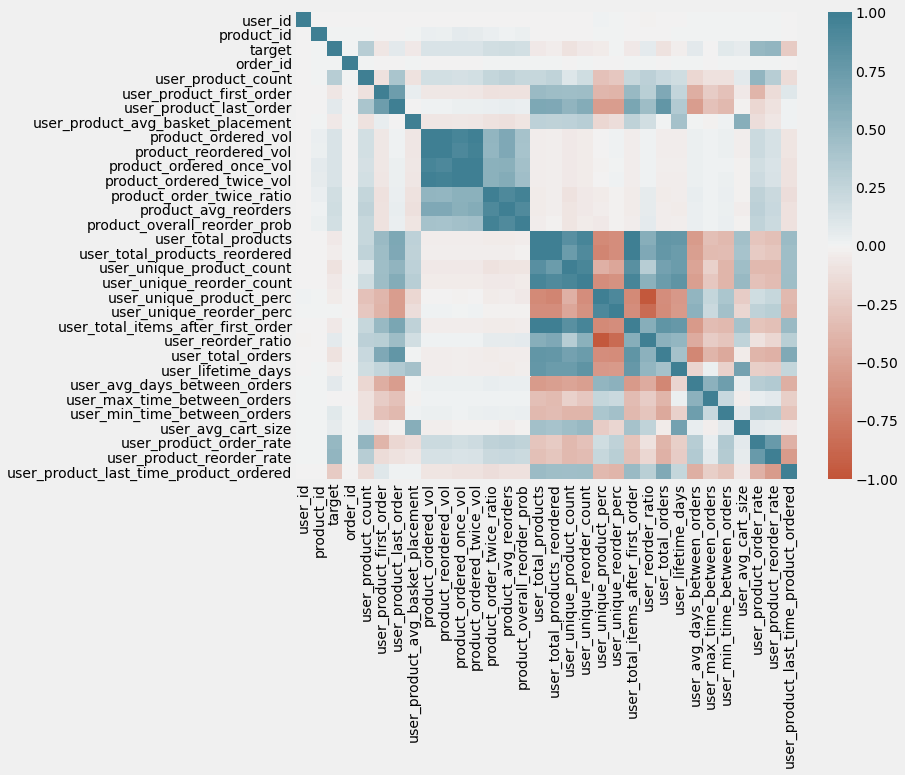

In [9]:
sns.heatmap(full_df.corr(),vmin=-1, vmax=1, center=0,
           cmap=sns.diverging_palette(20, 220, n=200))

In [10]:
full_df.drop(['product_ordered_once_vol','product_reordered_vol',
             'user_unique_product_count','user_unique_reorder_count',
             'user_total_items_after_first_order'],axis=1, inplace=True)

<AxesSubplot:>

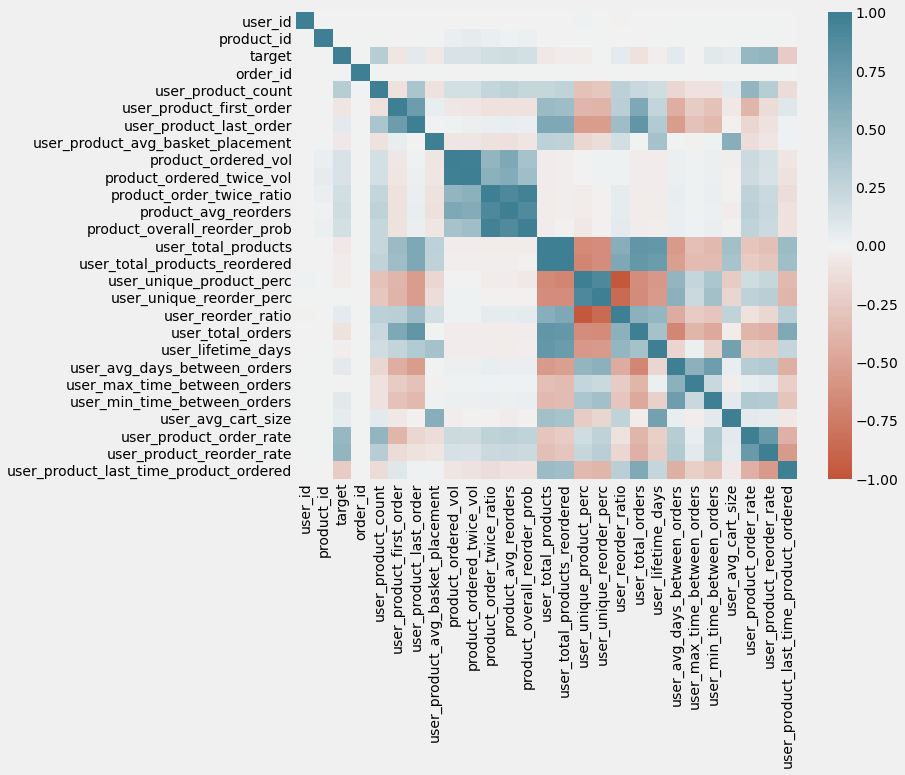

In [11]:
sns.heatmap(full_df.corr(),vmin=-1, vmax=1, center=0,
           cmap=sns.diverging_palette(20, 220, n=200))

### Multicolinearity Check 
columns that have high correlation with other features

In [12]:
cor_matrix = full_df.corr().abs()
upper = cor_matrix.where(
    np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
# print(upper)

drop_these = [column for column in upper.columns if any(upper[column] > 0.80)]

In [13]:
drop_these

['product_ordered_twice_vol',
 'product_avg_reorders',
 'product_overall_reorder_prob',
 'user_total_products_reordered',
 'user_unique_reorder_perc',
 'user_reorder_ratio']

In [14]:
full_new = full_df.drop(full_df[drop_these], axis=1)
full_new.head()

,user_id,product_id,eval_set,target,order_id,user_product_count,user_product_first_order,user_product_last_order,user_product_avg_basket_placement,product_ordered_vol,...,user_unique_product_perc,user_total_orders,user_lifetime_days,user_avg_days_between_orders,user_max_time_between_orders,user_min_time_between_orders,user_avg_cart_size,user_product_order_rate,user_product_reorder_rate,user_product_last_time_product_ordered
0,112108,49302,train,1,1,3,1,4,2.000000,170,...,0.480000,4,167.000000,9.823529,15.000000,7.000000,6.250000,0.750000,0.750000,0
1,112108,11109,train,1,1,3,1,4,3.333333,4579,...,0.480000,4,167.000000,9.823529,15.000000,7.000000,6.250000,0.750000,0.750000,0
2,112108,43633,train,1,1,3,1,4,4.000000,663,...,0.480000,4,167.000000,9.823529,15.000000,7.000000,6.250000,0.750000,0.750000,0
3,112108,22035,train,1,1,3,1,4,6.000000,61241,...,0.480000,4,167.000000,9.823529,15.000000,7.000000,6.250000,0.750000,0.750000,0
4,79431,19660,train,1,36,16,2,23,4.562500,57921,...,0.523316,23,3238.000000,17.597826,30.000000,2.000000,8.391304,0.695652,0.727273,0


Only doing analysis on users whose # of total orders are greater than the mean, or 16+. This is done so we can cater reordering predictions to those users who use Instacart the most

In [15]:
gr_mean= full_new[full_new.user_total_orders > 16]

In [16]:
gr_mean

,user_id,product_id,eval_set,target,order_id,user_product_count,user_product_first_order,user_product_last_order,user_product_avg_basket_placement,product_ordered_vol,...,user_unique_product_perc,user_total_orders,user_lifetime_days,user_avg_days_between_orders,user_max_time_between_orders,user_min_time_between_orders,user_avg_cart_size,user_product_order_rate,user_product_reorder_rate,user_product_last_time_product_ordered
4,79431,19660,train,1,36,16,2,23,4.562500,57921,...,0.523316,23,3238.000000,17.597826,30.000000,2.000000,8.391304,0.695652,0.727273,0
5,79431,43086,train,1,36,4,5,23,6.250000,15699,...,0.523316,23,3238.000000,17.597826,30.000000,2.000000,8.391304,0.173913,0.210526,0
6,79431,46620,train,1,36,2,15,23,5.000000,1101,...,0.523316,23,3238.000000,17.597826,30.000000,2.000000,8.391304,0.086957,0.222222,0
7,79431,34497,train,1,36,2,8,23,6.500000,4411,...,0.523316,23,3238.000000,17.597826,30.000000,2.000000,8.391304,0.086957,0.125000,0
8,79431,48679,train,1,36,3,17,23,4.666667,53618,...,0.523316,23,3238.000000,17.597826,30.000000,2.000000,8.391304,0.130435,0.428571,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8474650,103510,49187,prior,0,1597750,1,30,30,1.000000,149,...,0.542125,31,3236.000000,12.211321,28.000000,0.000000,8.806452,0.032258,0.500000,1
8474651,103510,20126,prior,0,1597750,1,30,30,2.000000,1030,...,0.542125,31,3236.000000,12.211321,28.000000,0.000000,8.806452,0.032258,0.500000,1
8474652,52726,38061,prior,0,3161449,1,2,2,9.000000,546,...,0.098131,43,1526.000000,7.554455,28.000000,1.000000,4.976744,0.023256,0.023810,41
8474659,175185,12023,prior,0,651501,1,23,23,6.000000,3554,...,0.473684,32,2242.000000,9.876652,30.000000,1.000000,7.718750,0.031250,0.100000,9


## Splitting Data
Will first split dataset into train, test, validation sets and then do a T/T/S on training set for model tuning

In [17]:
full_df.shape

(8474661, 28)

In [18]:
gr_mean.shape

(4696252, 22)

In [19]:
np.random.seed(42)
train, validate, test = \
        np.split(gr_mean.sample(frac=1, random_state=42), 
                 [int(.6*len(gr_mean)), int(.8*len(gr_mean))])
#                  [int(.8*len(gr_mean))])                 

In [20]:
print(train.shape) #60%
print(test.shape) #20%
print(validate.shape) #20

(2817751, 22)
(939251, 22)
(939250, 22)


In [21]:
print(train.target.mean())
print(test.target.mean())
print(validate.target.mean())
print(test.target.mean())

0.0738049600550226
0.07405475213760752
0.07409422411498535
0.07405475213760752


In [22]:
X= train.drop(["target",'eval_set'],axis=1)
y= train['target']

In [23]:
print(X.mean())
print(X.std())

train_mean = X.mean()
train_std = X.std()

user_id                                   102703.327528
product_id                                 25477.055306
order_id                                 1699830.015542
user_product_count                             3.122163
user_product_first_order                      16.015885
user_product_last_order                       24.659342
user_product_avg_basket_placement              9.392136
product_ordered_vol                        21503.647275
product_order_twice_ratio                      0.825969
user_total_products                          481.869992
user_unique_product_perc                       0.372412
user_total_orders                             40.039543
user_lifetime_days                          3857.238310
user_avg_days_between_orders                   9.550936
user_max_time_between_orders                  25.797339
user_min_time_between_orders                   1.508893
user_avg_cart_size                            12.331163
user_product_order_rate                        0

In [24]:
X_val = validate.drop(["target",'eval_set'],axis=1)

In [25]:
X_fin = test.drop(["target",'eval_set'],axis=1)

In [26]:
print(X.shape)
print(y.shape)

(2817751, 20)
(2817751,)


In [27]:
#comparing feature means for train test validation data 
pd.concat([X.mean(),X_val.mean(),X_fin.mean()], axis=1)

,0,1,2
user_id,102703.327528,102605.113186,102603.008050
product_id,25477.055306,25472.904636,25493.647991
order_id,1699830.015542,1700892.429388,1700243.863488
user_product_count,3.122163,3.136983,3.117078
user_product_first_order,16.015885,16.019217,16.009205
user_product_last_order,24.659342,24.710572,24.651358
user_product_avg_basket_placement,9.392136,9.385113,9.387093
product_ordered_vol,21503.647275,21580.045634,21405.717983
product_order_twice_ratio,0.825969,0.826454,0.825553
user_total_products,481.869992,482.232310,481.571441


In [94]:
X_train, X_test, y_train, y_test = (
    train_test_split(X,y, test_size=0.2, random_state=42))

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
type(X_train)

(2254200, 20)
(563551, 20)
(2254200,)
(563551,)


pandas.core.frame.DataFrame

In [30]:
train.to_csv('../../data/train.csv')
test.to_csv('../../data/test.csv')
validate.to_csv('../../data/validate.csv')

In [31]:
# X_train = X_train.sort_index(axis=1)
# X_test = X_test.sort_index(axis=1)
X_test[(X_test.user_id == 148742) &(X_test.product_id == 13997)]

,user_id,product_id,order_id,user_product_count,user_product_first_order,user_product_last_order,user_product_avg_basket_placement,product_ordered_vol,product_order_twice_ratio,user_total_products,user_unique_product_perc,user_total_orders,user_lifetime_days,user_avg_days_between_orders,user_max_time_between_orders,user_min_time_between_orders,user_avg_cart_size,user_product_order_rate,user_product_reorder_rate,user_product_last_time_product_ordered


### Scaling all features minus ID features using ColumnTransformer

In [32]:
col_names = X_train.drop(['user_id','product_id','order_id'],axis=1)
col_names = col_names.columns
all_cols = X_train.columns
features = X_train[all_cols]
# features

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([('train_scaler', StandardScaler(), col_names)], remainder='passthrough')

X_train_scaled = ct.fit_transform(features)
X_test_scaled = ct.transform(X_test)


In [33]:
cols_reordered = ['user_product_count', 'user_product_first_order',
         'user_product_last_order', 'user_product_avg_basket_placement',
         'product_ordered_vol', 'product_order_twice_ratio',
         'user_total_products', 'user_unique_product_perc', 'user_total_orders',
         'user_lifetime_days', 'user_avg_days_between_orders',
         'user_max_time_between_orders', 'user_min_time_between_orders',
         'user_avg_cart_size', 'user_product_order_rate',
         'user_product_reorder_rate', 'user_product_last_time_product_ordered',
         'user_id','product_id','order_id']
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns = cols_reordered) 
X_train_scaled_df
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=X_test.index, columns = cols_reordered)
X_test_scaled_df

X_train_scaled_df['user_id'] = X_train_scaled_df.user_id.astype('str')
X_train_scaled_df['order_id'] = X_train_scaled_df.order_id.astype('str')
X_train_scaled_df['product_id'] = X_train_scaled_df.product_id.astype('str')

X_test_scaled_df['user_id'] = X_test_scaled_df.user_id.astype('str')
X_test_scaled_df['order_id'] = X_test_scaled_df.order_id.astype('str')
X_test_scaled_df['product_id'] = X_test_scaled_df.product_id.astype('str')

X_train_scaled_df.dtypes
# X_test_scaled_df

user_product_count                        float64
user_product_first_order                  float64
user_product_last_order                   float64
user_product_avg_basket_placement         float64
product_ordered_vol                       float64
product_order_twice_ratio                 float64
user_total_products                       float64
user_unique_product_perc                  float64
user_total_orders                         float64
user_lifetime_days                        float64
user_avg_days_between_orders              float64
user_max_time_between_orders              float64
user_min_time_between_orders              float64
user_avg_cart_size                        float64
user_product_order_rate                   float64
user_product_reorder_rate                 float64
user_product_last_time_product_ordered    float64
user_id                                    object
product_id                                 object
order_id                                   object


In [34]:
# print(y_test.shape)
# print(X_test.shape)
print(X_train_scaled_df.shape)
print(X_test_scaled_df.shape)
print(y_train.shape)

(2254200, 20)
(563551, 20)
(2254200,)


In [35]:
zip(set(y_train), ('orange', 'blue'))

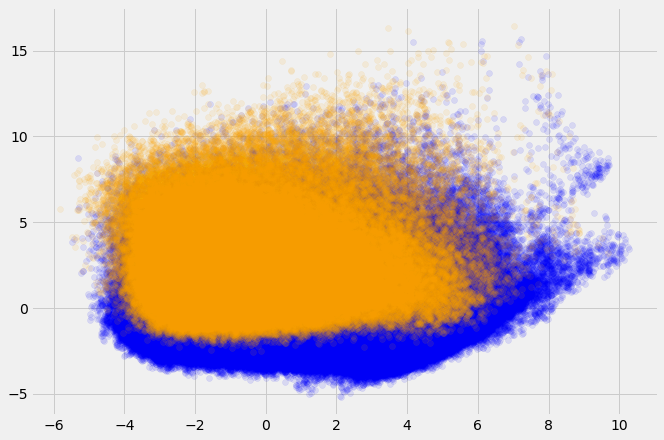

In [36]:
from sklearn.decomposition import PCA

X_train_scaled = X_train_scaled_df.iloc[:,:17]
X_test_scaled = X_test_scaled_df.iloc[:,:17]

pca = PCA(n_components=2)
X_train_dim_red = pca.fit_transform(X_train_scaled)
X_test_dim_red = pca.transform(X_test_scaled)

fig, ax = plt.subplots(figsize=(10, 7))
for label, color in zip(set(y_train), ('blue', 'orange')):
    ax.scatter(
        X_train_dim_red[y_train == label, 0],
        X_train_dim_red[y_train == label, 1],
        color=color, label=f'Class {label}',
        alpha=0.1)

### Ended up not using standardized features 

In [37]:
# X_train = X_train_scaled_df
# X_test = X_test_scaled_df 

In [38]:
X_train

,user_id,product_id,order_id,user_product_count,user_product_first_order,user_product_last_order,user_product_avg_basket_placement,product_ordered_vol,product_order_twice_ratio,user_total_products,user_unique_product_perc,user_total_orders,user_lifetime_days,user_avg_days_between_orders,user_max_time_between_orders,user_min_time_between_orders,user_avg_cart_size,user_product_order_rate,user_product_reorder_rate,user_product_last_time_product_ordered
4517811,86645,2295,1358236,1,35,35,5.000000,26129,0.853450,472,0.351695,57,2283.000000,4.888651,25.000000,0.000000,8.280702,0.017544,0.043478,22
3028733,6714,27177,277782,1,1,1,9.000000,629,0.455814,532,0.133459,47,3431.000000,6.585413,24.000000,1.000000,11.319149,0.021277,0.021277,46
4436966,163003,38108,1850797,1,27,27,36.000000,2977,0.939024,1043,0.259827,59,6388.000000,6.299803,20.000000,0.000000,17.677966,0.016949,0.030303,32
5956797,180273,27730,2150877,2,3,4,5.500000,11286,1.083361,393,0.501272,40,3735.000000,9.676166,30.000000,1.000000,9.825000,0.050000,0.052632,36
8087060,177209,48229,1355003,1,7,7,4.000000,1175,0.638448,294,0.421769,32,3150.000000,11.170213,30.000000,1.000000,9.187500,0.031250,0.038462,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253871,185638,38510,2608658,2,29,37,8.500000,1713,0.550725,359,0.339833,43,2839.000000,8.181556,23.000000,0.000000,8.348837,0.046512,0.133333,6
905379,135103,1695,3219460,2,1,6,7.500000,6088,0.981761,352,0.230114,32,3296.000000,9.665689,30.000000,5.000000,11.000000,0.062500,0.062500,26
5490867,18113,39563,778935,1,4,4,12.000000,122,0.535714,399,0.428571,18,7044.000000,19.404959,30.000000,6.000000,22.166667,0.055556,0.066667,14
7266064,61483,12312,2193097,1,3,3,8.000000,6031,0.553815,275,0.265455,18,3368.000000,13.054264,30.000000,3.000000,15.277778,0.055556,0.062500,15


## Logistic Regression 

In [39]:
X_train

,user_id,product_id,order_id,user_product_count,user_product_first_order,user_product_last_order,user_product_avg_basket_placement,product_ordered_vol,product_order_twice_ratio,user_total_products,user_unique_product_perc,user_total_orders,user_lifetime_days,user_avg_days_between_orders,user_max_time_between_orders,user_min_time_between_orders,user_avg_cart_size,user_product_order_rate,user_product_reorder_rate,user_product_last_time_product_ordered
4517811,86645,2295,1358236,1,35,35,5.000000,26129,0.853450,472,0.351695,57,2283.000000,4.888651,25.000000,0.000000,8.280702,0.017544,0.043478,22
3028733,6714,27177,277782,1,1,1,9.000000,629,0.455814,532,0.133459,47,3431.000000,6.585413,24.000000,1.000000,11.319149,0.021277,0.021277,46
4436966,163003,38108,1850797,1,27,27,36.000000,2977,0.939024,1043,0.259827,59,6388.000000,6.299803,20.000000,0.000000,17.677966,0.016949,0.030303,32
5956797,180273,27730,2150877,2,3,4,5.500000,11286,1.083361,393,0.501272,40,3735.000000,9.676166,30.000000,1.000000,9.825000,0.050000,0.052632,36
8087060,177209,48229,1355003,1,7,7,4.000000,1175,0.638448,294,0.421769,32,3150.000000,11.170213,30.000000,1.000000,9.187500,0.031250,0.038462,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253871,185638,38510,2608658,2,29,37,8.500000,1713,0.550725,359,0.339833,43,2839.000000,8.181556,23.000000,0.000000,8.348837,0.046512,0.133333,6
905379,135103,1695,3219460,2,1,6,7.500000,6088,0.981761,352,0.230114,32,3296.000000,9.665689,30.000000,5.000000,11.000000,0.062500,0.062500,26
5490867,18113,39563,778935,1,4,4,12.000000,122,0.535714,399,0.428571,18,7044.000000,19.404959,30.000000,6.000000,22.166667,0.055556,0.066667,14
7266064,61483,12312,2193097,1,3,3,8.000000,6031,0.553815,275,0.265455,18,3368.000000,13.054264,30.000000,3.000000,15.277778,0.055556,0.062500,15


In [40]:
1-y_train.mean()

0.9263472628870553

In [41]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print(logreg.score(X_test, y_test))


0.9248941089626316


In [42]:
reorder_logit_prob = logreg.predict_proba(X_test)[:,1]

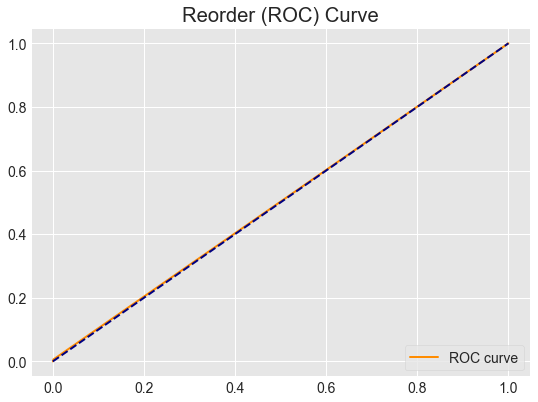

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
gen_auc_viz(fpr, tpr, thresholds)

# roc_curve(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96    521615
           1       0.28      0.01      0.01     41936

    accuracy                           0.92    563551
   macro avg       0.61      0.50      0.49    563551
weighted avg       0.88      0.92      0.89    563551

f1:0.01200,auc:0.50244,loss_score:0.07511


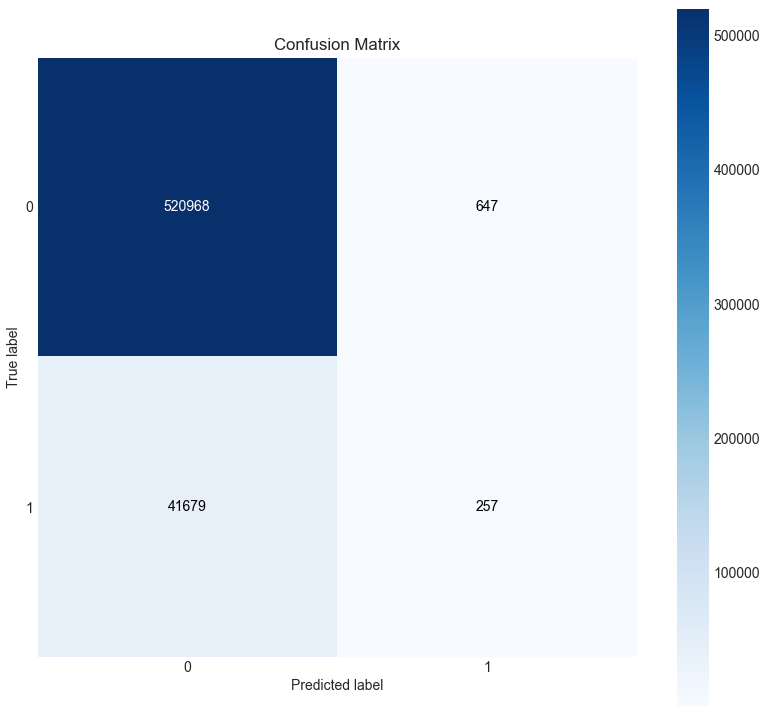

In [44]:
plot_cm(y_test, y_pred)

f1=f1_score(y_test,y_pred)
brier=brier_score_loss(y_test,y_pred)
auc=roc_auc_score(y_test,y_pred)

print(classification_report(y_test,y_pred))
print(f"f1:{f1:.5f},auc:{auc:.5f},loss_score:{brier:.5f}")

The model is not great at predicting true positives

### Tuning Parameters
C regularization + class weights

In [45]:
# C_param_range = [0.001,0.01,0.1,1,10,100,1000]

# stored_score_vals = pd.DataFrame(columns = ['C_parameter','F1','AUC','Accuracy'])
# stored_score_vals['C_parameter'] = C_param_range

# j = 0
# for i in C_param_range:
#     logreg = LogisticRegression(penalty = 'l2', C= i, random_state = 0)
#     logreg.fit(X_train, y_train)
    
#     y_pred = logreg.predict(X_test)
#     print(logreg.score(X_test, y_test))
    
#     reorder_logit_prob = logreg.predict_proba(X_test)[:,1]
    
#     stored_score_vals.iloc[j,1] = f1_score(y_test,y_pred)
#     stored_score_vals.iloc[j,2] = roc_auc_score(y_test,y_pred)
#     stored_score_vals.iloc[j,3] = accuracy_score(y_test,y_pred)
#     j += 1



{'class_weight': {0: 0.06836734693877551, 1: 0.9316326530612244}}


<AxesSubplot:xlabel='weight'>

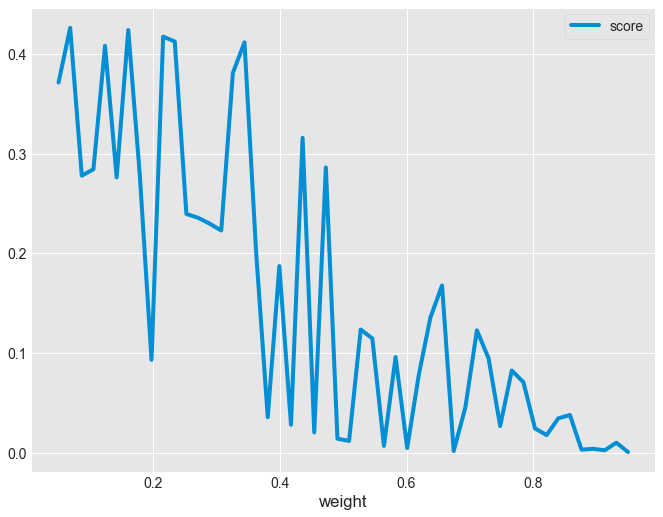

In [103]:
weights = np.linspace(0.05, 0.95, 50)

clf = LogisticRegression(max_iter=500)
grid_values = {'class_weight':[{0:x, 1:1.0-x} for x in weights]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'f1',cv=3)

grid_result = grid_clf_acc.fit(X_train, y_train)
y_pred = grid_clf_acc.predict(X_test)

print(grid_result.best_params_)

weight_plts = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],'weight': weights })
weight_plts.plot(x='weight')

best param = {'class_weight': {0: 0.14473684210526316, 1: 0.8552631578947368}}
{'class_weight': {0: 0.06836734693877551, 1: 0.9316326530612244}}

In [104]:
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression(class_weight={0: 0.06836734693877551, 1: 0.9316326530612244}, max_iter=500)
grid_values = {'penalty': ['l2'],'C':[0.001,.009,0.01,.1,1,5,10,25,100,1000]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'f1')

grid_clf_acc.fit(X_train, y_train)

y_pred = grid_clf_acc.predict(X_test)

f1=f1_score(y_test,y_pred)
brier=brier_score_loss(y_test,y_pred)
auc=roc_auc_score(y_test,y_pred)

print(classification_report(y_test,y_pred))
print(f"f1:{f1:.5f},auc:{auc:.5f},loss_score:{brier:.5f}")

confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.94      0.55      0.70    521615
           1       0.10      0.58      0.16     41936

    accuracy                           0.56    563551
   macro avg       0.52      0.57      0.43    563551
weighted avg       0.88      0.56      0.66    563551

f1:0.16383,auc:0.56909,loss_score:0.44371


array([[289004, 232611],
       [ 17440,  24496]])

In [105]:
grid_clf_acc.best_params_

{'C': 100, 'penalty': 'l2'}

In [48]:
# stored_score_vals

In [115]:
# logreg = LogisticRegression(penalty = 'l2', C= 0.1, random_state = 0, max_iter=500)
logreg = LogisticRegression(C=100, penalty= 'l2',class_weight={0: 0.06836734693877551, 1: 0.9316326530612244}, max_iter=500)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
reorder_logit_prob = logreg.predict_proba(X_test)[:,1]

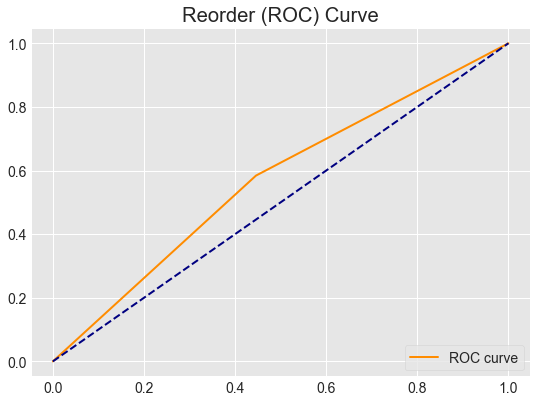

In [116]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
gen_auc_viz(fpr, tpr, thresholds)

              precision    recall  f1-score   support

           0       0.94      0.55      0.70    521615
           1       0.10      0.58      0.16     41936

    accuracy                           0.56    563551
   macro avg       0.52      0.57      0.43    563551
weighted avg       0.88      0.56      0.66    563551

f1:0.16383,auc:0.56909,loss_score:0.44371


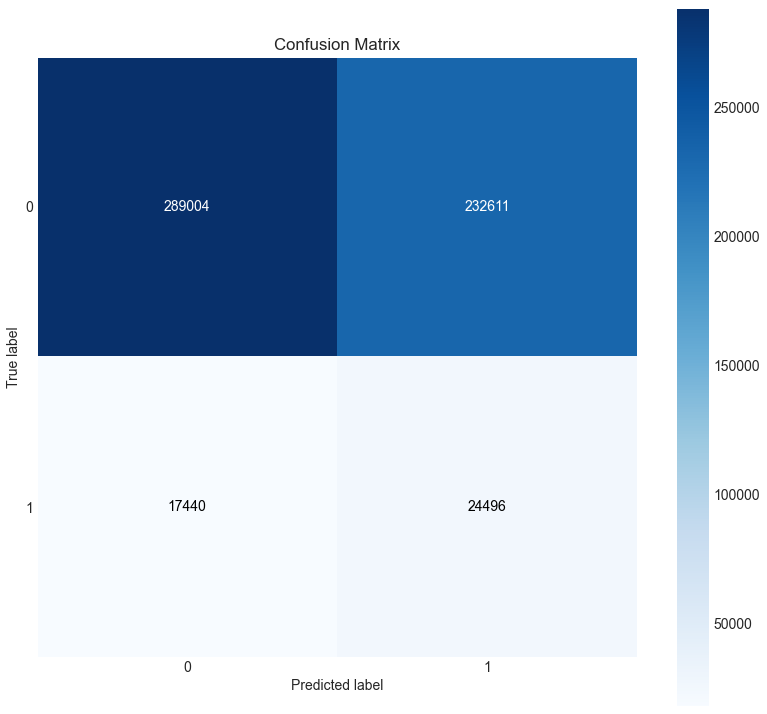

In [117]:
plot_cm(y_test, y_pred)
f1=f1_score(y_test,y_pred)
brier=brier_score_loss(y_test,y_pred)
auc=roc_auc_score(y_test,y_pred)

print(classification_report(y_test,y_pred))
print(f"f1:{f1:.5f},auc:{auc:.5f},loss_score:{brier:.5f}")

### Tuning right probability threshold 
Goal is to set probability threshold to different intervals, and see which threshold produces the 'best' success metric.

In [119]:

for i in np.arange(0.0,1.0,0.05):
    prob_thresh = i
    cm = pd.DataFrame(metrics.confusion_matrix
                      (y_true=y_test, y_pred=reorder_logit_prob > i), 
                      columns=['Negative Pred', 'Positive Pred'])
    tn = cm.iloc[0,0]
    fn = cm.iloc[1,0]
    fp = cm.iloc[0,1]
    tp = cm.iloc[1,1]
    
    acc = (tp+tn) / (tp+tn+fp+fn)
    sen = (tp) / (tp+fn) #summarizes how well the positive class was predicted.
    prec = tp / (tp+fp) #summarizes the fraction of examples assigned the positive class that belong to the positive class
    rec = tp/(tp+fn) #same as sensitivity 
    pp = tp / (tp+fp)

    f1=f1_score(y_test,reorder_logit_prob > i)
    brier=brier_score_loss(y_test, reorder_logit_prob > i)
    auc=roc_auc_score(y_test, reorder_logit_prob > i)

    print(round(i,2),f"accuracy:{acc:.5f},sensitivity:{sen:.5f},precision:{prec:.5f},recall:{rec:.5f}, ppv:{pp:5f}")
    print(f"f1:{f1:.5f},auc:{auc:.5f},loss_score:{brier:.5f}")
    print(" ")

0.0 accuracy:0.07441,sensitivity:1.00000,precision:0.07441,recall:1.00000, ppv:0.074414
f1:0.13852,auc:0.50000,loss_score:0.92559
 
0.05 accuracy:0.07441,sensitivity:1.00000,precision:0.07441,recall:1.00000, ppv:0.074414
f1:0.13852,auc:0.50000,loss_score:0.92559
 
0.1 accuracy:0.07441,sensitivity:1.00000,precision:0.07441,recall:1.00000, ppv:0.074414
f1:0.13852,auc:0.50000,loss_score:0.92559
 
0.15 accuracy:0.07441,sensitivity:1.00000,precision:0.07441,recall:1.00000, ppv:0.074414
f1:0.13852,auc:0.50000,loss_score:0.92559
 
0.2 accuracy:0.07441,sensitivity:1.00000,precision:0.07441,recall:1.00000, ppv:0.074414
f1:0.13852,auc:0.50000,loss_score:0.92559
 
0.25 accuracy:0.07441,sensitivity:1.00000,precision:0.07441,recall:1.00000, ppv:0.074414
f1:0.13852,auc:0.50000,loss_score:0.92559
 
0.3 accuracy:0.07441,sensitivity:1.00000,precision:0.07441,recall:1.00000, ppv:0.074414
f1:0.13852,auc:0.50000,loss_score:0.92559
 
0.35 accuracy:0.07441,sensitivity:1.00000,precision:0.07441,recall:1.0000

A good threshold that optimizes on f1 + auc as well as loss. is .55

In [120]:
cm = pd.DataFrame(metrics.confusion_matrix
                  (y_true=y_test, y_pred=reorder_logit_prob > 0.55), 
                  columns=['Negative Pred', 'Positive Pred'])

scores_output(y_test, reorder_logit_prob > 0.55)


              precision    recall  f1-score   support

           0       0.94      0.86      0.90    521615
           1       0.14      0.28      0.19     41936

    accuracy                           0.81    563551
   macro avg       0.54      0.57      0.54    563551
weighted avg       0.88      0.81      0.84    563551

f1:0.18537,auc:0.57042,loss_score:0.18562


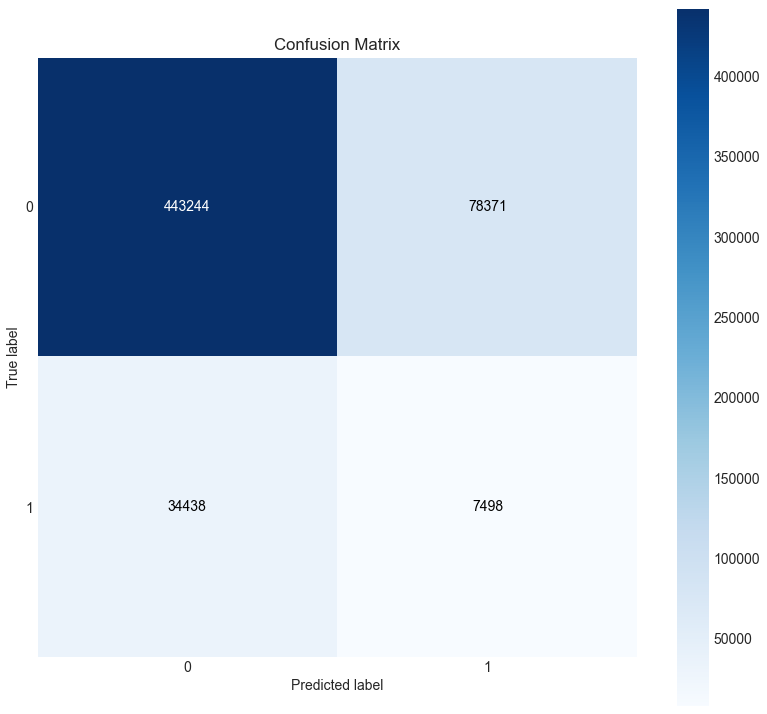

In [54]:
plot_cm(y_test, reorder_logit_prob > 0.15)

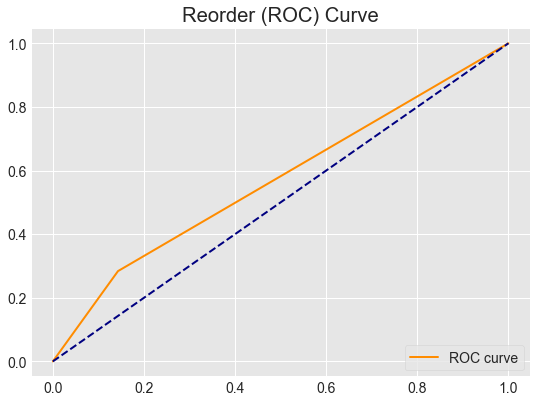

In [121]:
fpr, tpr, thresholds = roc_curve(y_test, reorder_logit_prob > 0.55)
#Visualization for ROC curve
gen_auc_viz(fpr, tpr, thresholds)

## Feature Selection 

### Select K Best 

In [56]:
from sklearn.feature_selection import SelectKBest, chi2

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_model_new = SelectKBest(score_func=chi2,k=20)
fit= X_model_new.fit(X_train,y_train)
X_model_new
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X_train.columns)

feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  

In [57]:
feature_ranks = feature_scores.sort_values('Score', ascending=False).reset_index(drop=True)
feature_ranks.rename(columns={"Feature_Name":"Select_K_rank","Score":"Select_K_score"},inplace=True)
feature_ranks

,Select_K_rank,Select_K_score
0,product_ordered_vol,4937603842.278155
1,user_lifetime_days,3733639.660559
2,order_id,3571524.377105
3,user_product_last_time_product_ordered,2757599.382986
4,user_product_count,2233620.144547
5,user_product_last_order,928567.905249
6,user_product_first_order,101735.141507
7,user_product_reorder_rate,92082.924425
8,product_id,77018.921222
9,user_total_orders,74708.977246


<AxesSubplot:xlabel='Select_K_rank'>

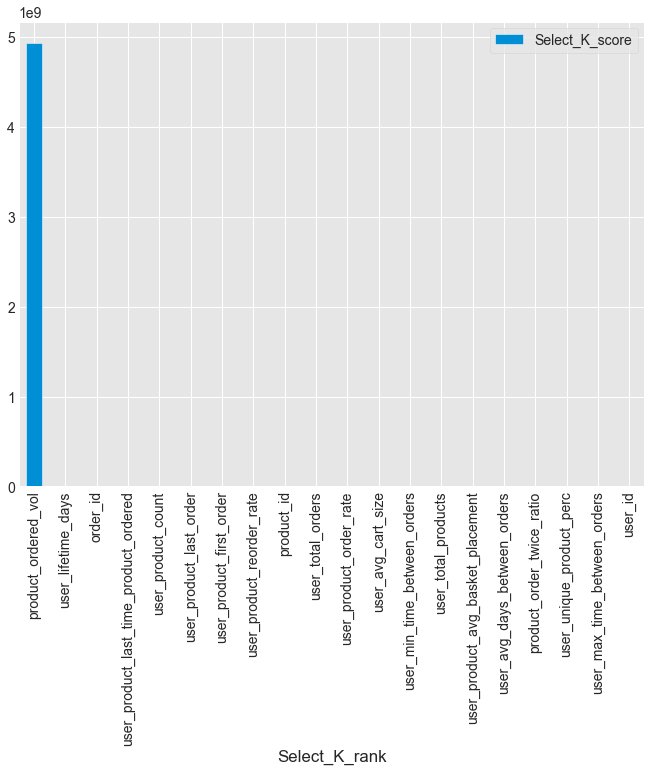

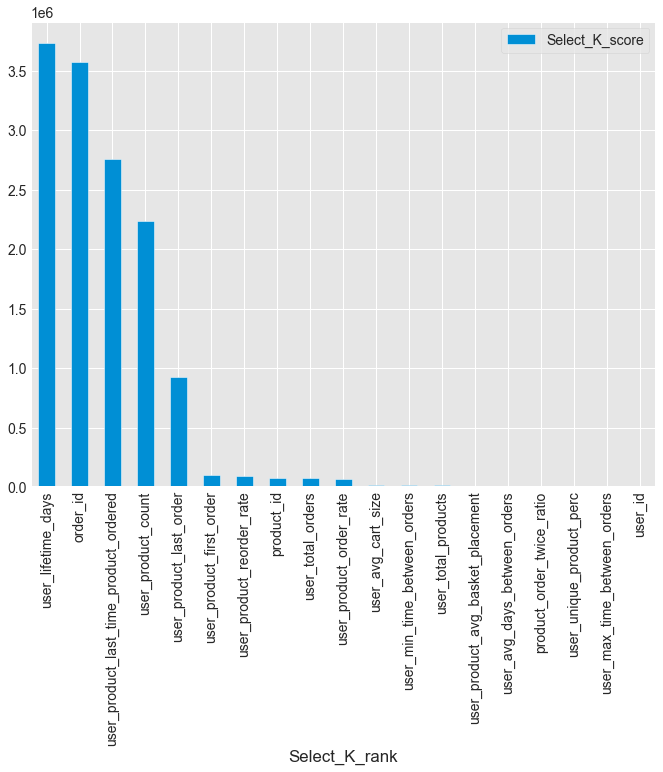

In [58]:
feature_ranks.plot(kind='bar',x='Select_K_rank',y='Select_K_score')
feature_ranks.iloc[1:].plot(kind='bar',x='Select_K_rank',y='Select_K_score')

In [59]:
# best_features = feature_ranks['Select_K_rank'][:11]
# best_features
best_features = pd.concat([feature_ranks.iloc[:11,:],feature_ranks.iloc[-1:,:]])
best_features = best_features.Select_K_rank
# best_features = best_features.tolist()

<AxesSubplot:>

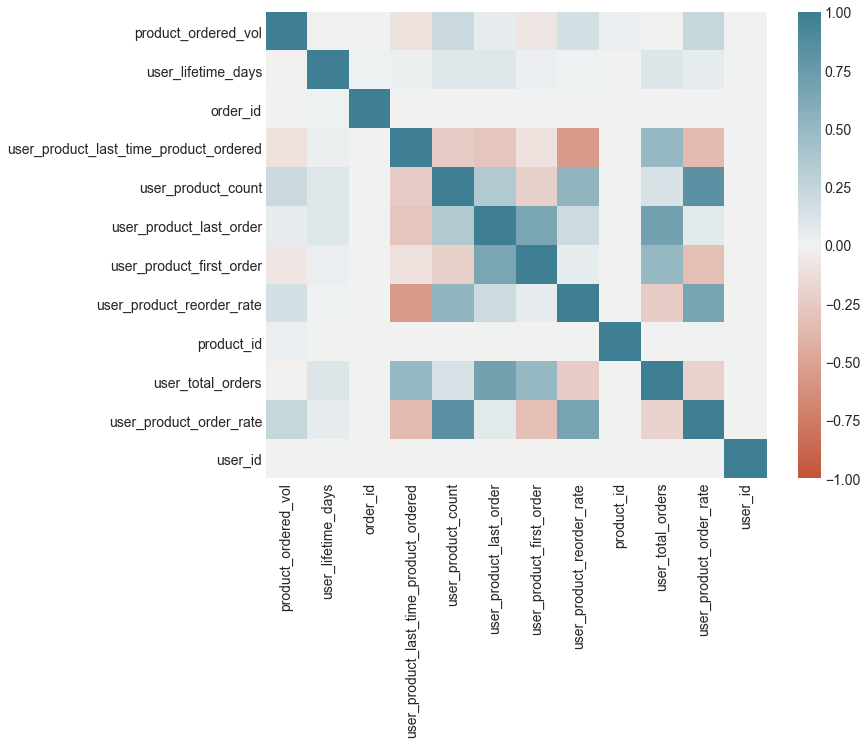

In [60]:
sns.heatmap(gr_mean[best_features].corr(),vmin=-1, vmax=1, center=0,
           cmap=sns.diverging_palette(20, 220, n=200))

### RFE

In [61]:
# from sklearn.feature_selection import RFE

# logreg=LogisticRegression(penalty = 'l2', C= .1, max_iter=500)
# selector = RFE(logreg, n_features_to_select = 1)
# selector = selector.fit(X_train, y_train);

# order = selector.ranking_
# order

# feature_ranks=[]
# for i in order:
#     feature_ranks.append(f"{i}).{X_train.columns[i]}") 
# feature_ranks

### Select from model

In [62]:
from sklearn.feature_selection import SelectFromModel

# sfm1= SelectFromModel(logreg, threshold='mean')
# sfm2= SelectFromModel(logreg, threshold='median')
sfm3= SelectFromModel(logreg, threshold= -np.inf)
# sfm1.fit(X_train, y_train)
# sfm2.fit(X_train, y_train)
sfm3.fit(X_train, y_train)

feature_idx = sfm3.get_support()
feature_name = X_train.columns[feature_idx]
feature_name

Index(['user_id', 'product_id', 'order_id', 'user_product_count',
       'user_product_first_order', 'user_product_last_order',
       'user_product_avg_basket_placement', 'product_ordered_vol',
       'product_order_twice_ratio', 'user_total_products',
       'user_unique_product_perc', 'user_total_orders', 'user_lifetime_days',
       'user_avg_days_between_orders', 'user_max_time_between_orders',
       'user_min_time_between_orders', 'user_avg_cart_size',
       'user_product_order_rate', 'user_product_reorder_rate',
       'user_product_last_time_product_ordered'],
      dtype='object')

## Validate
Run model against validation set

### final model

f1:0.18537352719003822,auc:0.5704239163784397


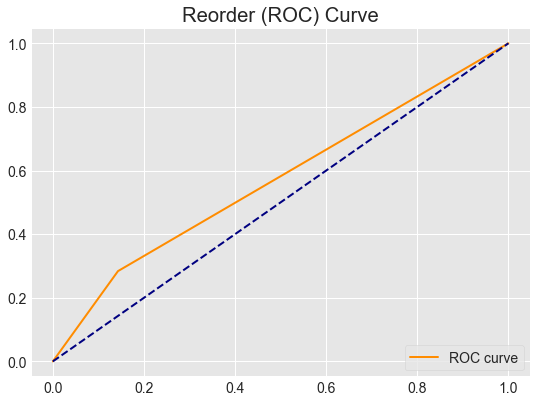

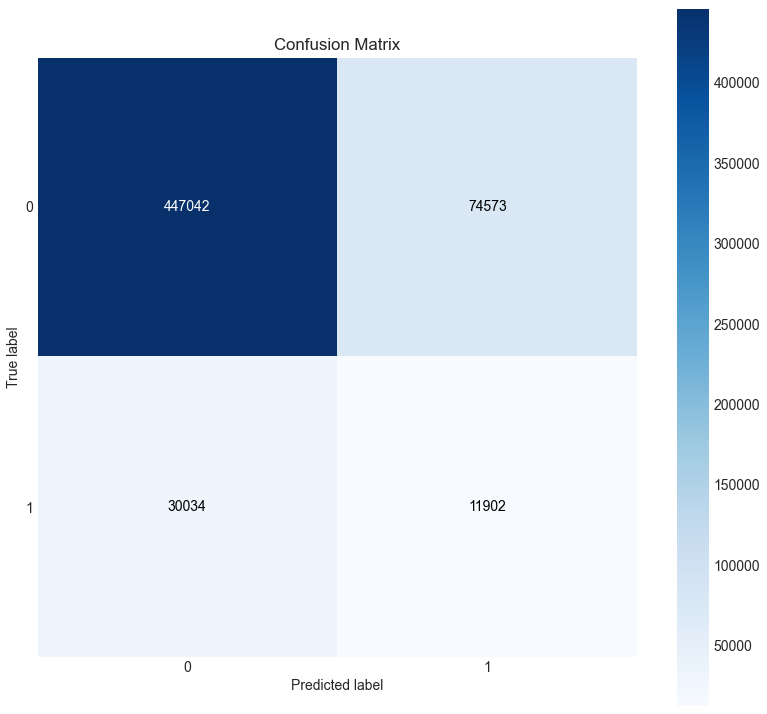

In [122]:
#Final model 
# X_train = X_train[best_features] 
# X_test = X_test[best_features]

logreg = LogisticRegression(C=100, penalty= 'l2',class_weight={0: 0.06836734693877551, 1: 0.9316326530612244}, max_iter=500)
logreg.fit(X_train, y_train)

reorder_logit_prob = logreg.predict_proba(X_test)[:,1]

f1=f1_score(y_test,reorder_logit_prob > .55)
brier=brier_score_loss(y_test, reorder_logit_prob > .55)
auc=roc_auc_score(y_test, reorder_logit_prob > .55)

print(f"f1:{f1},auc:{auc}")

#plot ROC 
fpr, tpr, thresholds = roc_curve(y_test, reorder_logit_prob > .55)

#Visualization for ROC curve
gen_auc_viz(fpr, tpr, thresholds)

plot_cm(y_test, reorder_logit_prob > .55)

### validate

f1:0.18398272427723067,auc:0.5698513506876286


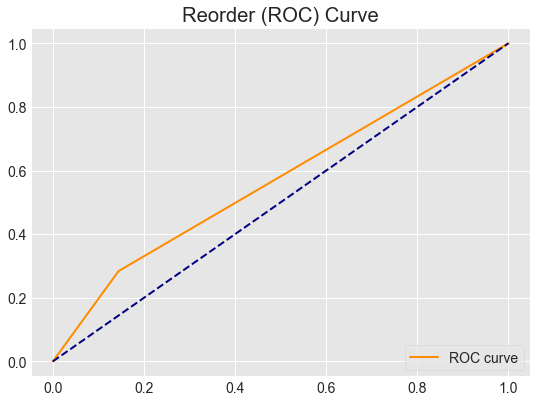

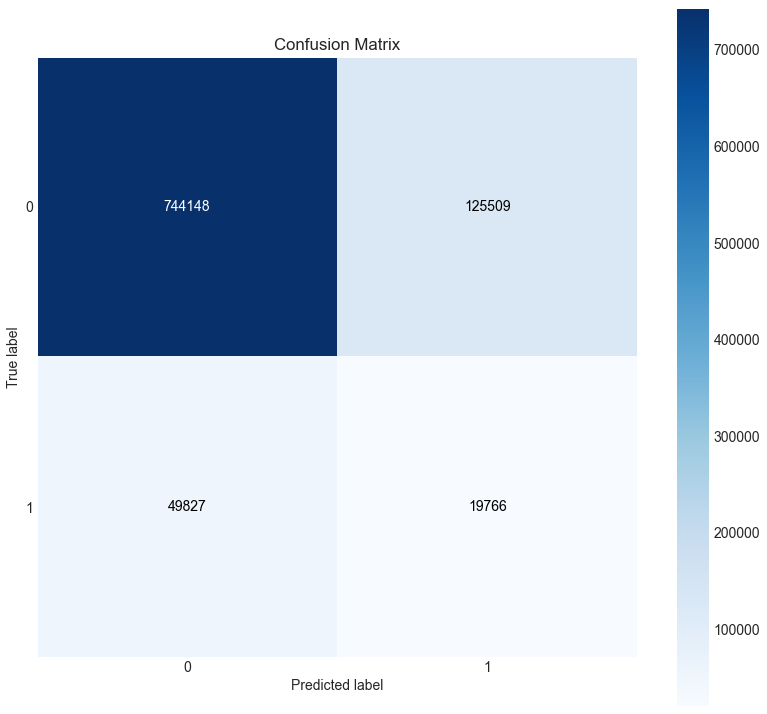

In [123]:
X_val = validate.drop(["target",'eval_set'],axis=1)
y_val = validate['target']

#New X and y for validation data
# X_val= validate[best_features]

#Standardize using training mean/std 
# X_val = (X_val-train_mean)/train_std
# X_val.dropna(axis=1,inplace=True)

# X_val = ct.transform(X_val)

# X_val

# logreg = LogisticRegression(penalty = 'l2', C= .1, max_iter=500)
# logreg.fit(X_val, y_val)

reorder_logit_prob = logreg.predict_proba(X_val)[:,1]

f1=f1_score(y_val,reorder_logit_prob > .55)
brier=brier_score_loss(y_val, reorder_logit_prob > .55)
auc=roc_auc_score(y_val, reorder_logit_prob > .55)

print(f"f1:{f1},auc:{auc}")

#plot ROC 
fpr, tpr, thresholds = roc_curve(y_val, reorder_logit_prob > .55)

#Visualization for ROC curve
gen_auc_viz(fpr, tpr, thresholds)

plot_cm(y_val, reorder_logit_prob > .55)

### test

f1:0.18312384429932355,auc:0.5690221246997575


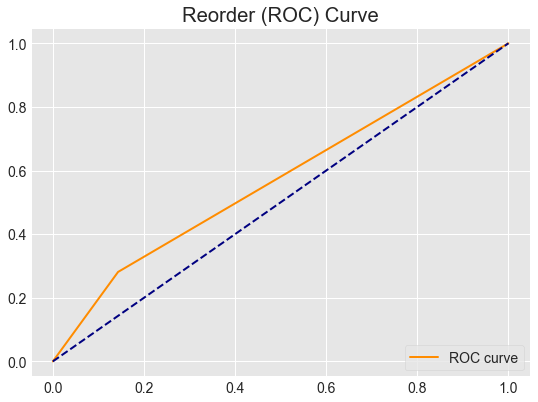

In [124]:
#New X and y for test data

X_final = test.drop(["target",'eval_set'],axis=1)
y_final = test['target']
# X_final = test[best_features]

reorder_logit_prob = logreg.predict_proba(X_final)[:,1]

f1=f1_score(y_final,reorder_logit_prob > .55)
brier=brier_score_loss(y_final, reorder_logit_prob > .55)
auc=roc_auc_score(y_final, reorder_logit_prob > .55)

print(f"f1:{f1},auc:{auc}")

#plot ROC 
fpr, tpr, thresholds = roc_curve(y_final, reorder_logit_prob > .55)

#Visualization for ROC curve
gen_auc_viz(fpr, tpr, thresholds)

In [78]:
len(pd.Series(reorder_logit_prob).unique())

939251

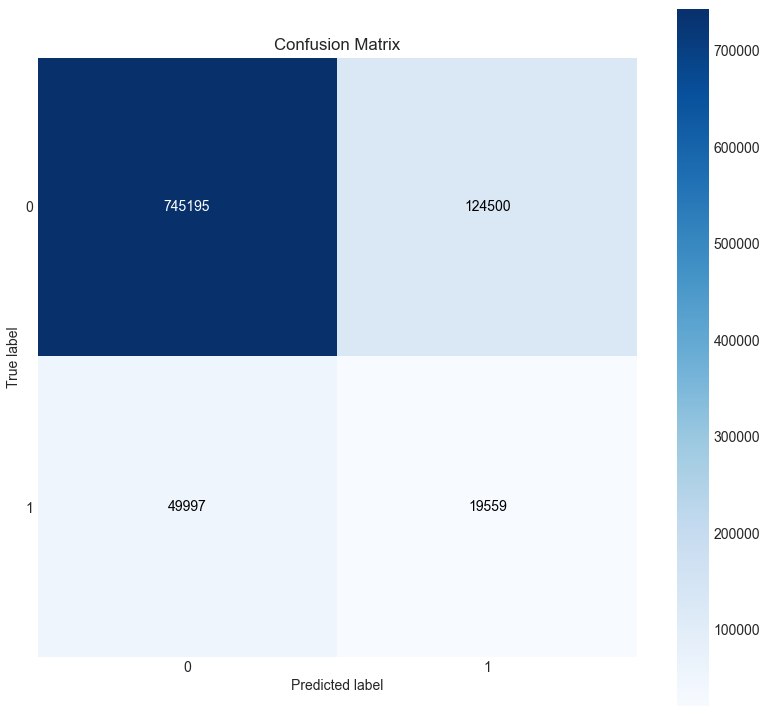

In [125]:
plot_cm(y_final, reorder_logit_prob > .55)

f1:0.18488357039354752,auc:0.5708593001840766


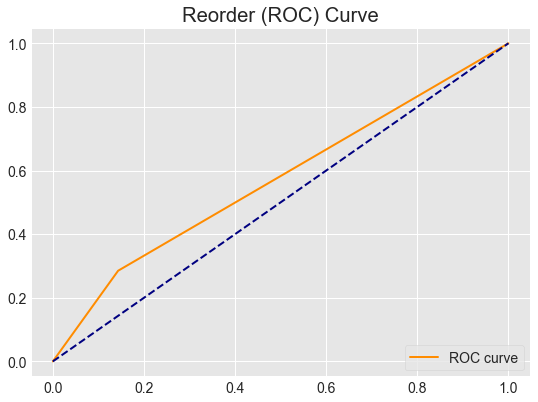

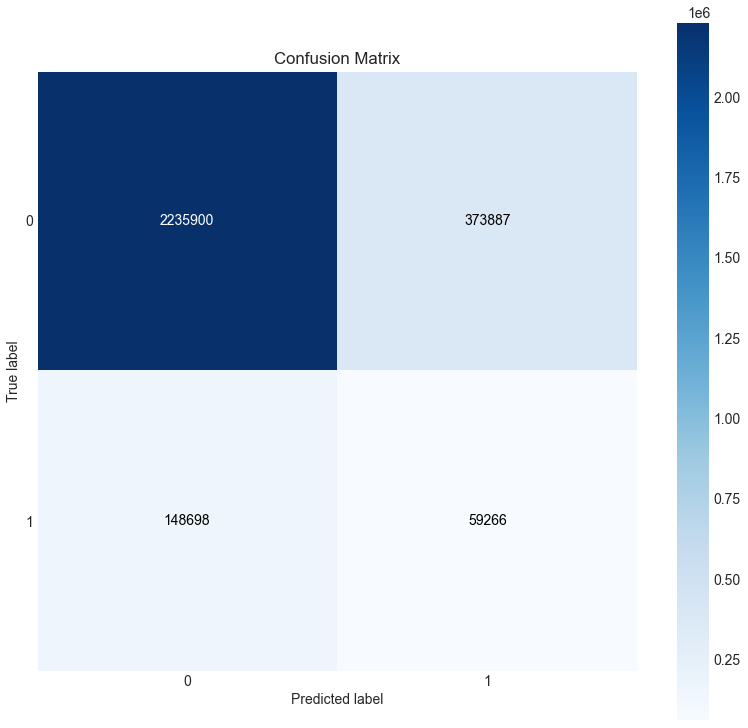

In [127]:
X_whole = X
y_whole = y

reorder_logit_prob = logreg.predict_proba(X_whole)[:,1]

f1=f1_score(y_whole,reorder_logit_prob > .55)
brier=brier_score_loss(y_whole, reorder_logit_prob > .55)
auc=roc_auc_score(y_whole, reorder_logit_prob > .55)

print(f"f1:{f1},auc:{auc}")

#plot ROC 
fpr, tpr, thresholds = roc_curve(y_whole, reorder_logit_prob > .55)

#Visualization for ROC curve
gen_auc_viz(fpr, tpr, thresholds)

plot_cm(y_whole, reorder_logit_prob > .55)